# Lagrange polynomial interpolation

We start from the regular expression of the Lagrange interpolation

$p_n(x) = \sum\limits_{i=0}^{n} f(x_i)l_{in}(x)$ &nbsp; &nbsp; &nbsp; &nbsp;    (1)

where

$l_{in} (x) = \frac{x-x_0}{x_i-x_0}\frac{x-x_1}{x_i-x_1}\dots\frac{x-x_{i-1}}{x_i-x_{i-1}}\frac{x-x_{i+1}}{x_i-x_{i+1}}\dots\frac{x-x_n}{x_i-x_n}\ = \prod\limits_{\substack{j=0 \\ j\neq i}}^{n} \frac{x-x_j}{x_i-x_j}$ &nbsp; &nbsp; &nbsp; &nbsp;    (2)

We define the function $w(x)$:

$w(x) = (x-x_0)(x-x_1)\dots(x-x_n) = \prod\limits_{i=0}^{n}(x-x_i)$ &nbsp; &nbsp; &nbsp; &nbsp;    (3)

and we define $\beta_i$ como

$\beta_i = \frac{1}{\prod\limits_{\substack{j=0 \\ j\neq i}}^{n}(x_i-x_j)}, i=0, 1, \dots , n$ &nbsp; &nbsp; &nbsp; &nbsp; (4)

so that we can rewrite the polynomials $l_{in}(x)$ as:

$l_{in} (x) = \prod\limits_{\substack{j=0 \\ j\neq i}}^{n} \frac{x-x_j}{x_i-x_j} \frac{\prod\limits_{\substack{j=0 \\ j\neq i}}^{n}(x-x_j)}{\prod\limits_{\substack{j=0 \\ j\neq i}}^{n}(x_i-x_j)} = \frac{w(x)\beta_i}{x-x_i}$ &nbsp; &nbsp; &nbsp; &nbsp; (5)

Thus, we can express the interpolating polynomial of degree n in the form:

$p_n(x) = w(x) \sum\limits_{i=0}^{n}\frac{\beta_i f(x_i)}{x-x_i} $ &nbsp; &nbsp; &nbsp; &nbsp; (6)

Suppose we interpolate the unit function $f(x) = 1$, así que $f(x_i)=1, i=0,i,..., n$. Substituting in the previous equation:

$1 = w(x) \sum\limits_{i=0}^{n}\frac{\beta_i\cdot 1}{x-x_i} $ &nbsp; &nbsp; &nbsp; &nbsp; (7)

Since it is "1", we divide equation (6) by (7):

$p_n(x) = \frac{w(x) \sum\limits_{i=0}^{n}\frac{\beta_i f(x_i)}{x-x_i}}{w(x) \sum\limits_{i=0}^{n}\frac{\beta_i}{x-x_i}} $ &nbsp; &nbsp; &nbsp; &nbsp; (8)

And we get the final expression for the interpolating polynomial:

$p_n(x) = \frac{\sum\limits_{i=0}^{n}\frac{\beta_i f(x_i)}{x-x_i}}{\sum\limits_{i=0}^{n}\frac{\beta_i}{x-x_i}} $ &nbsp; &nbsp; &nbsp; &nbsp; (9)

The coefficients $ \ beta_i $ can be calculated in advance and the evaluation of the polynomial has been reduced to much simpler operations. Just take into account situations where $ x = x_i, i = 0,1, \ dots, n $. In those cases $ p_n (x_i) = f (x_i) $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementation with explicit loops

First, the interpolation function is designed by coding each part of the method using easily recognizable loops, which, in many cases, makes the code easier to interpret.


In [2]:
def LagrangeBariLoops(xi, yi, x):
    #xi -> vector of the abscissa of the known points
    #yi -> vector de las ordenadas de los puntos conocidos
    #x -> vector of the abscissa of the points to be evaluated by the interpolating polynomial
    
    n = len(xi)
    y = np.zeros(len(x))  #vector that stores the result y [x], interpolated values
    
    #We calculate the beta_i
    beta = np.ones(n) # At the beginning all beta_i are 1, to calculate the product    
    for i in range(n):
        for j in range(n):
            if i!=j:     #only if the indices are different (as it appears in equation (4))
                beta[i] = beta[i]/(xi[i]-xi[j])
        
    #We see if any value of x coincides with any of xi, to avoid indeterminacies (divide by 0)
    prohibidos = []   #stores the x-indices that cannot be evaluated by polynonium

    #You have to go through all the elements to find matches
    for k in range(len(x)):  #for all possible values of x
        coincide = False   #I guess, in principle it doesn't match
        for i in range(n):
            
            if x[k]==xi[i]: 
                coincide = True
                y[k] = yi[i] #is an interpolation node, so we know the value of the ordinate
                break   #and I don't keep looking
                
        prohibidos.append(coincide)
    
    #Evaluate numerator and denominator of equation (9) for each point to be interpolated
    for k in range(len(x)-1):  
        if prohibidos[k]==False: 
            
            num=0.0  
            den=0.0  
            
            for i in range(n):
                num = num + beta[i]*yi[i]/(x[k]-xi[i])
                den = den + beta[i]/(x[k]-xi[i])
                
            y[k] = num/den
    
    return y

## Using methods and array operations

In this case, we will take advantage of the power of some methods defined in Numpy that speed up the calculation of operations (divisions, sums, etc.) between matrices or vectors, element by element, as well as proper methods for operations between all elements within an array. .

In [3]:
def LagrangeBari(xi, yi, x):
    #xi -> vector of the abscissa of the known points
    #yi -> vector de las ordenadas de los puntos conocidos
    #x -> vector of the abscissa of the points to be evaluated by the interpolating polynomial
    
    n = len(xi)
    y = np.zeros(len(x))  # vector that stores the result y [x], interpolated values
    
    #Calculamos las beta_i
    beta = np.zeros(n)
    for i in range(n):
        ind = np.arange(n)!=i  #tomamos todos los indices de 0 a n, excepto el i
        beta[i] = 1./np.prod(xi[i]-xi[ind])
        
    #We see if any value of x coincides with any of xi, to avoid indeterminacies
    prohibidos = []
    for i in range(n):
        Dx = x - xi[i]
        coincide = np.where(Dx == 0)[0]
        
        if len(coincide>0):
            prohibidos.append(coincide[0])
            y[coincide[0]] = yi[i]

    permitidos = np.arange(len(x))!=prohibidos
    
    #We evaluate the numerator and denominator of equation (9)
    num = np.zeros(len(x))
    den = np.zeros(len(x))
    
    for i in range(n):
        num[permitidos] = num[permitidos] + beta[i]*yi[i]/(x[permitidos]-xi[i])
        den[permitidos] = den[permitidos] + beta[i]/(x[permitidos]-xi[i])
        
    y[permitidos] = num[permitidos]/den[permitidos]
    
    return y
        

We will perform a basic test of interpolation of an exponential function

Calculation with explicit loops
4.18 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Calculation with some optimizations
155 µs ± 5.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


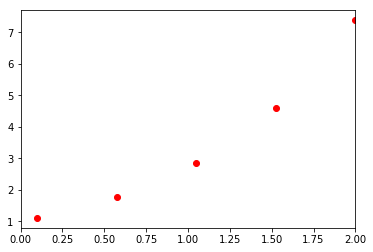

In [4]:
#We generate 5 points that follow an exponential function
max = 2.0
xs = np.linspace(0.1, max, 5)   
ys = np.exp(xs)                  

#We will evaluate the interpolating polynomial at 500 points
xx = np.linspace(0.0, max, 500)



#We call the functions with the appropriate parameters and measure the time
print("Calculation with explicit loops")
%timeit -c yll = LagrangeBariLoops(xs,ys,xx)
print("Calculation with some optimizations")
%timeit -c yl = LagrangeBari(xs,ys,xx)

fig, ax = plt.subplots()
ax.plot(xs, ys, 'ro')
ax.set_xlim((0, max))
#ax.plot(xx, yl, '-b',lw=4)
#ax.plot(xx, y, '-g',lw=2)
    
plt.show()